In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import datetime
import missingno as msno
import matplotlib.pyplot as plt
# 显示所有列
pd.set_option('display.max_columns', None)

# 显示所有行
pd.set_option('display.max_rows', None)

# 设置value的显示长度为100，默认为50
pd.set_option('max_colwidth', 100)
file = '../../dataset/ibtracs.WP.list.v04r00.csv'

data = pd.read_csv(file)

# data = data[['SID', 'BASIN', 'SUBBASIN', 'ISO_TIME','NATURE', 'LAT', 'LON', 'WMO_WIND', 'WMO_PRES', 'WMO_AGENCY', 'DIST2LAND', 'LANDFALL',
#               'USA_AGENCY','USA_R34_NE','USA_R34_SE',"USA_R34_SW",'USA_R34_NW','USA_R50_NE','USA_R50_SE','USA_R50_SW','USA_R50_NW',
#              'USA_POCI','USA_ROCI','USA_RMW','USA_EYE','TOKYO_R50_DIR','TOKYO_R50_LONG','TOKYO_R50_SHORT','TOKYO_R30_DIR',
#              'TOKYO_R30_LONG','TOKYO_R30_SHORT','TOKYO_LAND','STORM_SPEED','STORM_DIR'
# ]]
# data = data[['SID', 'ISO_TIME','LON', 'LAT','STORM_SPEED', 'DIST2LAND', 'TRACK_TYPE', 
#        'STORM_DIR',   'NATURE', 'SUBBASIN',
#        'BASIN', 'LANDFALL', 'USA_SSHS', 'USA_ATCF_ID','USA_WIND', 'TOKYO_R30_DIR', 'TOKYO_GRADE', 'TOKYO_R50_DIR',
#        'TOKYO_PRES',  'USA_STATUS', 'CMA_CAT',
#        'USA_PRES',  'CMA_PRES', 'CMA_WIND', 'USA_POCI',
#        'USA_ROCI', 'USA_RMW', 'HKO_CAT', 'HKO_WIND', 'HKO_PRES',
#         'TOKYO_R30_LONG', 'TOKYO_WIND', 'TOKYO_R30_SHORT',
#        'USA_R34_NE', 'USA_R34_SE', 'USA_R34_NW', 'USA_R34_SW', 'TOKYO_LAND',
#        'WMO_AGENCY', 'WMO_PRES', 'USA_AGENCY', 'WMO_WIND', 'TOKYO_R50_LONG',
#        'TOKYO_R50_SHORT', 'USA_R50_NE', 'USA_R50_SE', 'USA_R50_NW',
#        'USA_R50_SW']]
data = data[['SID', 'ISO_TIME','LON', 'LAT','STORM_SPEED', 'DIST2LAND', 'TRACK_TYPE', 'STORM_DIR', 'NATURE', 'SUBBASIN','BASIN', 'LANDFALL', 'USA_WIND', 'TOKYO_R30_DIR', 'TOKYO_GRADE', 'TOKYO_R50_DIR','TOKYO_PRES', 'USA_POCI','USA_ROCI', 'USA_RMW', 'TOKYO_R30_LONG', 
             'TOKYO_R30_SHORT', 'USA_R34_NE', 'USA_R34_SE', 'USA_R34_NW', 'USA_R34_SW', 'TOKYO_LAND',  'TOKYO_R50_LONG', 'TOKYO_R50_SHORT', 'USA_R50_NE', 'USA_R50_SE', 'USA_R50_NW','USA_R50_SW']]
data = data[1:]
data['ISO_TIME'] =  pd.to_datetime(data['ISO_TIME'])
begin = datetime.datetime(2000,1,1,0,0,0)
# 选择西北太平洋 且2000年之后的数据
data = data[(data['BASIN']=='WP') & (data['ISO_TIME']>=begin)]
dataNew = data.replace({' ':np.nan})
dataNew.to_csv('original_data.csv')
# print(dataNew.shape)
missing = dataNew.isnull().sum()
# print(missing)

#缺失值的展示 
# def plot_missing(df):
#     # 对缺失值列进行计数
#     missing = df.isnull().sum()
#     missing = missing[missing > 0]
#     #missing.sort_values(inplace=True)
#     missing.plot.bar(figsize=(12,6))
#     missing.sort_values(inplace=True)
# #     msno.matrix(df,)
#     plt.savefig('missing.png')
# plot_missing(dataNew)
# print('-------------------')

begin = datetime.datetime(2019,1,1,0,0,0)
end = datetime.datetime(2020,1,1,0,0,0)
year20 = dataNew[(data['ISO_TIME']>=begin) & (data['ISO_TIME']<=end)]
len(year20['SID'].unique())

31

In [298]:
# 数据预处理
# one-hot 编码
# 归一化特征 TRACK_TYPE, NATURE,SUBBASIN,BASIN,HKO_CAT
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

 
class One_hot_encoder:
    def __init__(self, df, column_name_list):
        self.df = df
        self.column_name_list = column_name_list

    def multi_column_encoder(self):
        Enc_ohe, Enc_label = OneHotEncoder(), LabelEncoder()
        for column_name in self.column_name_list:
            self.df["Dummies"] = Enc_label.fit_transform(self.df[column_name])
            self.df_dummies = pd.DataFrame(Enc_ohe.fit_transform(self.df[["Dummies"]]).todense(),
                                           columns=Enc_label.classes_)
            self.df_dummies.rename(columns=lambda x: column_name + "_" + x, inplace=True)
            self.df = pd.concat([self.df, self.df_dummies], axis=1)
            self.df.drop(["Dummies"], axis=1, inplace=True)
        self.df.drop(self.column_name_list, axis=1, inplace=True)
        return self.df

    
column_name_list = ['NATURE', 'SUBBASIN', 'BASIN','TRACK_TYPE']
dataNew = pd.read_csv('original_data.csv')
dataNew.drop(['DEL'],axis = 1,inplace=True)

df_encoded = One_hot_encoder(dataNew, column_name_list).multi_column_encoder()
pd.set_option('display.max_columns', None)
# 编码后维度
print('编码后维度',df_encoded.shape)
# df_encoded.head()

# # 归一化
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import numpy as np
minMaxScaler = MinMaxScaler()
data_str = df_encoded[['SID','ISO_TIME']]
data_num = df_encoded.iloc[:,2:]
num_columns = data_num.columns
col = ['SID','ISO_TIME']
col += list(num_columns)
print(len(col))
data_v = data_num.values.astype(np.float)
data_v = minMaxScaler.fit_transform(data_v)
data_v = np.hstack((data_str.values,data_v))
data = pd.DataFrame(data_v,columns=col)
data.to_csv('data_norm.csv')

data.head()

编码后维度 (38636, 42)
42


,SID,ISO_TIME,LON,LAT,STORM_SPEED,DIST2LAND,STORM_DIR,LANDFALL,USA_WIND,TOKYO_R30_DIR,TOKYO_GRADE,TOKYO_R50_DIR,TOKYO_PRES,USA_POCI,USA_ROCI,USA_RMW,TOKYO_R30_LONG,TOKYO_R30_SHORT,USA_R34_NE,USA_R34_SE,USA_R34_NW,USA_R34_SW,TOKYO_LAND,TOKYO_R50_LONG,TOKYO_R50_SHORT,USA_R50_NE,USA_R50_SE,USA_R50_NW,USA_R50_SW,NATURE_DS,NATURE_ET,NATURE_MX,NATURE_NR,NATURE_SS,NATURE_TS,SUBBASIN_MM,BASIN_WP,TRACK_TYPE_PROVISIONAL,TRACK_TYPE_main,TRACK_TYPE_spur-merge,TRACK_TYPE_spur-other,TRACK_TYPE_spur-split
0,2000125N06136,2000-05-03 18:00:00,0.446468,0.0910569,0.137931,0.243235,0.955556,0.243541,0.09375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,1,0,0,0,1,0,0,0
1,2000125N06136,2000-05-03 21:00:00,0.444404,0.100366,0.126437,0.264317,0.958333,0.26465,0.09375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,1,0,0,0,1,0,0,0
2,2000125N06136,2000-05-04 00:00:00,0.442716,0.108943,0.114943,0.281938,0.966667,0.282294,0.09375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,1,0,0,0,1,0,0,0
3,2000125N06136,2000-05-04 03:00:00,0.441715,0.116179,0.091954,0.29421,0.980556,0.294581,0.09375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,1,0,0,0,1,0,0,0
4,2000125N06136,2000-05-04 06:00:00,0.441465,0.121951,0.0689655,0.302077,0.00555556,0.302457,0.09375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,1,0,0,0,1,0,0,0


训练集 epoch:1,loss:0.8006332516670227
测试集 epoch:1,loss is 1.1007332801818848
训练集 epoch:2,loss:1.0639559030532837
测试集 epoch:2,loss is 1.048992395401001
训练集 epoch:3,loss:1.0314024686813354
测试集 epoch:3,loss is 1.0317575931549072
训练集 epoch:4,loss:1.0220624208450317
测试集 epoch:4,loss is 1.0317575931549072
训练集 epoch:5,loss:0.9319124221801758
测试集 epoch:5,loss is 0.9359242916107178
训练集 epoch:6,loss:0.9424735307693481
测试集 epoch:6,loss is 0.9359242916107178
训练集 epoch:7,loss:0.9260362982749939
测试集 epoch:7,loss is 0.9359242916107178
训练集 epoch:8,loss:0.9420243501663208
测试集 epoch:8,loss is 0.9359242916107178
训练集 epoch:9,loss:0.9392698407173157
测试集 epoch:9,loss is 0.9359242916107178
训练集 epoch:10,loss:0.9291229248046875
测试集 epoch:10,loss is 0.9359242916107178
训练集 epoch:11,loss:0.9313182830810547
测试集 epoch:11,loss is 0.9359242916107178
训练集 epoch:12,loss:0.9404674172401428
测试集 epoch:12,loss is 0.9359242916107178
训练集 epoch:13,loss:0.9382112622261047
测试集 epoch:13,loss is 0.9359242916107178
训练集 epoch:14,loss:

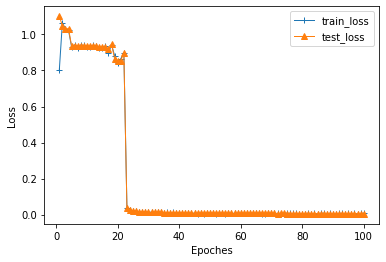

139.70041608810425


In [9]:
# 训练啦
import torch
import time
from torch import nn,optim
from torch.utils.data import DataLoader,Dataset
import os
import matplotlib.pyplot as plt# 数据加载
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
class DataSet(Dataset):
    '''
    构建数据集
    '''
    def __init__(self,data_pd):
        data_DAE = np.array(data_pd)
        self.x_data = torch.from_numpy(data_DAE[:,:]).type(torch.float32)
        self.y_data = torch.from_numpy(data_DAE[:,:]).type(torch.float32)
        self.len = data_DAE.shape[0]
    def __getitem__(self,index):
        return self.x_data[index],self.y_data[index]
    def __len__(self):
        '''
        返回数据的数目
        '''
        return self.len
    
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv2d') != -1:
        nn.init.xavier_normal_(m.weight.data)
        nn.init.constant_(m.bias.data, 0.0)
    elif classname.find('Linear') != -1:
        nn.init.xavier_normal_(m.weight)
        nn.init.constant_(m.bias, 0.0)

# 训练模型啦！
class Auto_Encoder(nn.Module):
    def __init__(self):
        super(Auto_Encoder,self).__init__()
        self.encoder = nn.Sequential(nn.Dropout(p=0.5),
                                     nn.Linear(40,32),
                                    nn.ReLU(True),
                                     nn.Dropout(p=0.5),
                                    nn.Linear(32,16),
                                    nn.ReLU(True),
#                                     nn.Dropout(p=0.5),
#                                     nn.Linear(24,16),
#                                     nn.ReLU(True),
                                     
                                     nn.Dropout(p=0.5),
                                      nn.Linear(16,8),
                                    nn.ReLU(True),
                                     nn.Dropout(p=0.5),
                                     nn.Linear(8,4)
                                     
                                    )
        self.decoder = nn.Sequential( nn.Dropout(p=0.5),
                                     nn.Linear(4,8),
                                    nn.ReLU(True),
                                     nn.Dropout(p=0.5),
                                    nn.Linear(8,16),
                                    nn.ReLU(True),
#                                      nn.Dropout(p=0.5),
#                                      nn.Linear(16,24),
#                                      nn.ReLU(True),
                                     nn.Dropout(p=0.5),
                                     nn.Linear(16,32),
                                     nn.ReLU(True),
                                     nn.Dropout(p=0.5),
                                     nn.Linear(32,40),
                                     nn.Tanh()
#                                      nn.Sigmoid()
                                    )
    def forward(self,x):
        encoder = self.encoder(x)
        decoder = self.decoder(encoder)
        return encoder,decoder


if __name__ == '__main__':
    # 画图用曲线
    start = time.time()
    loss_train = []
    loss_test = []
    x_epoch = []
    batch_size = 64
    lr = 0.001
    # 表示L2正则化
    weight_decay = 1e-4
    epoches = 100
    model = Auto_Encoder()
#     model.apply(weights_init)

# 权重初始化
    for m in model.modules():
        if isinstance(m,nn.Conv2d):
            nn.init.normal(m.weight.data)
            nn.init.xavier_normal(m.weight.data)
            nn.init.kaiming_normal(m.weight.data)#卷积层参数初始化
            m.bias.data.fill_(0)
        elif isinstance(m,nn.Linear):
            m.weight.data.normal_()#全连接层参数初始化
            
    data_all = pd.read_csv('data_norm.csv')
    data_all = data_all.replace({np.nan:0.0})

#     data_all.values.replaces({np.nan:'0'})
    # 去掉ID和时间以及序号
    data_all = data_all.iloc[:,3:]
    # 数据集划分 
    data_1,data_2= train_test_split(data_all,test_size=0.2,shuffle=True)
    
    train_data = DataSet(data_1)
    test_data = DataSet(data_2)
    # dataLoader构造
    train_loader = DataLoader(train_data,batch_size = batch_size,shuffle = True)
    test_loader = DataLoader(test_data,batch_size=batch_size,shuffle = False)
    criterion = nn.MSELoss()
    optimizier = optim.Adam(model.parameters(),lr = lr,weight_decay = weight_decay)
    if torch.cuda.is_available():
        model.cuda
    for epoch in range(epoches):
        train_batch_total = 0
        test_batch_total = 0
        test_loss = 0
        train_loss = 0        
#         for param_group in optimizier.param_groups:
#             param_group['lr'] *= 0.1
        # 训练
        for batch_idx, data in enumerate(train_loader):
            x,y = data
            optimizier.zero_grad()
            hidden_vector,output = model(x)
            loss = criterion(output,y)
            loss.backward()
            optimizier.step()
        print('训练集 epoch:{},loss:{}'.format(epoch+1,loss.item()))
        loss_train.append(loss.item())
        
        # 测试
        model.eval()
        with torch.no_grad():
            for batch_idx,data in enumerate(test_loader):
                x,y = data
                hidden_vector,output = model(x)
                loss = criterion(output,y)
#                 test_loss += loss.item()
                test_batch_total += 1
#             print('测试集 epoch:{},loss is {}'.format((epoch+1),test_loss/test_batch_total))
            print('测试集 epoch:{},loss is {}'.format((epoch+1),loss.item()))
            loss_test.append(loss.item())
        
    # 保存模型
    torch.save(model.state_dict(), 'AE_model.pkl')  
 
    
#     torch.save(model, 'AE_model.pkl')
# 可视化
    x_epoch = np.arange(1,101)
    plt.figure()
    plt.plot(x_epoch,loss_train,label='train_loss',marker='+',linewidth=1)
    plt.plot(x_epoch,loss_test,label='test_loss',marker='^',linewidth=1)
    plt.xlabel('Epoches')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    end = time.time()
    print(end-start)  
        


In [11]:
# 获得DAE的数据
import torch
# import Auto_Encoder
model_path = 'AE_model.pkl'

model = Auto_Encoder()  
model.load_state_dict(torch.load(model_path))  


# model = torch.load(model_path)

norm_origial = pd.read_csv('data_norm.csv')
norm_origial.drop(['I'],axis = 1,inplace=True)

data = norm_origial.iloc[:,2:]
data_id = norm_origial.iloc[:,:2]
label = norm_origial[['LAT','LON']]

data_all = data.replace({np.nan:0.0})
data_DAE = np.array(data_all)
x_data = torch.from_numpy(data_DAE[:,:]).type(torch.float32)
hidden_vector_torch,_ = model(x_data)

hidden_vector = pd.DataFrame(hidden_vector_torch.detach().numpy(),columns=['h1','h2','h3','h4'])
cols = ['SID','TIME','h1','h2','h3','h4','LAT','LON']
# print(hidden_vector)

hidden_vector_value = np.hstack((data_id.values,hidden_vector))
hidden_vector_value = np.hstack((hidden_vector_value,label.values))
hidden_vector_data = pd.DataFrame(hidden_vector_value,columns=cols)

# print(hidden_vector_data.head())

hidden_vector_data.to_csv('hidden_vector_data.csv')

# 监督化

def series_to_supervised(data,n_in,n_out,Label):
#     label : list 标签
    col_name = data.columns    
    cols,names = list(),list()
    # 输入序列
    for i in range(n_in,0,-1):
        cols.append(data.shift(i))
        names += [(x+'(t-%d)')%i for x in col_name]
       
    # 预测序列 (t,t+1,...,t+n)
    for i in range(0,n_out):
        for j in Label:
            cols.append(data[j].shift(-i))  
            names += ['label_'+j+'_(t+%d)'%i]    
#     print(names)
    data_super = pd.concat(cols,axis = 1)
    data_super.columns = names
    
    return data_super,cols

def supervised(data):
#     k:总步长
    start = 0
    data_new = pd.DataFrame()
    count = 0
    while start < len(data) - 2:
        target = start + 1
        # start 定死了，target 往后移
        while data['SID'][start] == data['SID'][target] and target < len(data) - 1:
            target += 1
        count += 1
#         print('start:%d,end:%d'%(start,target))
        data_local, cols = series_to_supervised(data[start:target],16,8,['LAT','LON']) 
        data_new = data_new.append(data_local,ignore_index=True)
        start = target
    return data_new,count  

data_new,count = supervised(hidden_vector_data)
del_features_1 = [['SID(t-'+str(i)+')','TIME(t-'+str(i)+')'] for i in range(16,0,-1)]

for i in del_features_1:
    data_new.drop(i,axis = 1,inplace=True)

data_new.to_csv('supervised_data.csv')
# print(data_new.head())
       

NameError: name 'PATH' is not defined

In [93]:
# Seq2Seq_Atten

import torch
import torch.nn.functional as F
import time
from torch import nn,optim
from torch.utils.data import DataLoader,Dataset
import os
import matplotlib.pyplot as plt# 数据加载
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
# 专属dataset
class DataSet_seq(Dataset):
    '''
    构建数据集
    '''
    def __init__(self,data_pd):
        data = np.array(data_pd)
        self.x_data = torch.from_numpy(data[:,0:16*6]).type(torch.float32)
        self.y_data = torch.from_numpy(data[:,16*6:]).type(torch.float32)
        self.len = data.shape[0]
        
    def __getitem__(self,index):
        return self.x_data[index],self.y_data[index]
    def __len__(self):
        '''
        返回数据的数目
        '''
        return self.len
    
    
class Encoder(nn.Module):
    def __init__(self,seq_len,n_features,embedding_dim = 64):
        super(Encoder,self).__init__()
        self.seq_len,self.n_features = seq_len,n_features
        self.embedding_dim,self.hidden_dim = embedding_dim,embedding_dim
        self.num_layers = 3
        self.rnn1 = nn.LSTM(
        input_size = n_features,
        hidden_size = self.hidden_dim,
        num_layers = 3,
        batch_first = True,
        dropout = 0.35
        )
    def forward(self,x):
        print('初始xshape：',x.shape)
        x = x.reshape((batch_sizes,self.seq_len,self.n_features))
        print('x reshape：',x.shape)
        h_1 = torch.zeros(self.num_layers,x.size(0),self.hidden_dim)
        c_1 = torch.zeros(self.num_layers,x.size(0),self.hidden_dim)
        x,(hidden,cell) = self.rnn1(x,(h_1,c_1,))
        print('Encoder 结束')
        print('x:{},hidden:{},cell:{}'.format(x.shape,hidden.shape,cell.shape))
        return x,hidden,cell
    
class Attention(nn.Module):
    def __init__(self,enc_hid_dim,dec_hid_dim):
        super().__init__()
        print('enc_hid_dim',enc_hid_dim)
        print('dec_hid_dim',dec_hid_dim)
#         self.attn = nn.Linear((enc_hid_dim)+dec_hid_dim,dec_hid_dim) 
        self.attn = nn.Linear(128,dec_hid_dim)
        self.v = nn.Linear(dec_hid_dim,1,bias = False)
    def forward(self,hidden,encoder_outputs):
        batch_size = encoder_outputs.shape[0]
        src_len = encoder_outputs.shape[1]
        hidden = hidden[2:3,:,:]
        hidden = hidden.repeat(1,src_len,1)
        energy = torch.tanh(self.attn(torch.cat((hidden,encoder_outputs),dim=2)))
        attention = self.v(energy).squeeze(2)
        print('Attention 结束')
        print(F.softmax(attention,dim=1))
        return F.softmax(attention,dim=1)
class Decoder(nn.Module):
    def __init__(self,seq_len,input_dim=64,n_features=2):
        super(Decoder,self).__init__()
        self.seq_len,self.input_dim = seq_len,input_dim
        self.hidden_dim,self.n_features = input_dim,n_features
        self.rnn1 = nn.LSTM(
            input_size=1,
            hidden_size=input_dim,
            num_layers=3,
            batch_first=True,
            dropout = 0.35
        )
        self.output_layer = nn.Linear(self.hidden_dim,n_features)
    def forward(self, x,input_hidden,input_cell): 
        print('decoder x shape:',x.shape)
        print(x.shape)
        x = x.reshape((1,1,1))
        x, (hidden_n, cell_n) = self.rnn1(x,(input_hidden,input_cell))
        x = self.output_layer(x)
        print('Decoder结束')
        print('x:{},hidden_n:{},cell_n:{}'.format(x.shape,hidden_n.shape,cell_n.shape))
        return x, hidden_n, cell_n
    
class AttentionDecoder(nn.Module):
    def __init__(self,seq_len,attention,input_dim = 64,n_features=2,encoder_hidden_state=512):
        super(AttentionDecoder,self).__init__()
        self.seq_len, self.input_dim = seq_len, input_dim
        self.hidden_dim, self.n_features =  input_dim, n_features
        self.attention = attention 
        self.rnn1 = nn.LSTM(
        input_size = encoder_hidden_state,
        hidden_size = input_dim,
        num_layers = 3,
        dropout = 0.35         
        )
        self.output_layer = nn.Linear(self.hidden_dim * 2 , n_features)
    def forward(self, x,input_hidden,input_cell,encoder_outputs):
        a = self.attention(input_hidden, encoder_outputs)
        a = a.unsqueeze(1)
        weighted = torch.bmm(a, encoder_outputs)
        x = x.reshape((1,1,1))
        rnn_input = torch.cat((x, weighted), dim = 2)
#         print('rnn_input shape',rnn_input.shape)
        # rnn_input [1,1,65]
        x, (hidden_n, cell_n) = self.rnn1(rnn_input,(input_hidden,input_cell))
        output = x.squeeze(0)
        weighted = weighted.squeeze(0)
        x = self.output_layer(torch.cat((output, weighted), dim = 1))
        return x, hidden_n, cell_n
       

class Seq2Seq(nn.Module):
    def __init__(self,seq_len,n_features,embedding_dim = 64,output_length = 8):
        super(Seq2Seq,self).__init__()
        self.encoder = Encoder(seq_len,n_features,embedding_dim)
        self.attention = Attention(512,512)
        self.output_length = output_length
        self.decoder = AttentionDecoder(seq_len,self.attention,embedding_dim,n_features)
    def forward(self,x, prev_y):
        encoder_output,hidden,cell = self.encoder(x)
        #Prepare place holder for decoder output
        targets_ta = []
        #prev_output become the next input to the LSTM cell
        prev_output = prev_y
        #itearate over LSTM - according to the required output days
        for out_days in range(self.output_length) :
            prev_x,prev_hidden,prev_cell = self.decoder(prev_output,hidden,cell,encoder_output)
            hidden,cell = prev_hidden,prev_cell
            prev_output = prev_x
            targets_ta.append(prev_x.reshape(1))
        targets = torch.stack(targets_ta)
        return targets

data = pd.read_csv('supervised_data.csv')

# 超参数设置
lr = 1e-4
epoches = 100
criterion = nn.MSELoss()
weight_decays = 1e-3
batch_sizes = 1

# 整体数据
data_new = data.iloc[16:,1:]

# 准备数据
data_train,data_test = train_test_split(data_new,test_size=0.2,shuffle=True) 
train_data = DataSet_seq(data_train)

test_data = DataSet_seq(data_test)

train_dataloader = DataLoader(dataset=train_data,batch_size=batch_sizes,shuffle=True)
test_dataloader = DataLoader(dataset=test_data,batch_size=batch_sizes,shuffle=False)

# 权重初始化
def init_weights(m):
    for name,parm in m.named_parameters():
#         print('参数')
#         print(name,parm)
        nn.init.uniform_(parm.data,-0.08,0.08)
        
# 参数设置
n_features = 6 # 时刻的特征 6
seq_length = 16 # 输入步长
label_length = 8 # 输出步长
model = Seq2Seq(seq_length,n_features)
# init_weights(model)
print('模型结构',model)
model.apply(init_weights)
optimizer = torch.optim.Adam(model.parameters(),lr=lr,weight_decay=weight_decays)

# 训练
for epoch in range(epoches):
    model = model.train()
    for batch_idx, data in enumerate(train_dataloader):
        x,y = data
        print('x shape',x.shape)
        print('y shape',y.shape)
        optimizier.zero_grad()
        output = model(x,torch.tensor([[0]]))
        
#         output = model(seq_inp,seq_inp[seq_length-1:seq_length,:])
        
        loss = criterion(output,y)
        loss.backward()
        optimizier.step()
    print('训练集 epoch:{},loss:{}'.format(epoch+1,loss.item()))
    

enc_hid_dim 512
dec_hid_dim 512
模型结构 Seq2Seq(
  (encoder): Encoder(
    (rnn1): LSTM(6, 64, num_layers=3, batch_first=True, dropout=0.35)
  )
  (attention): Attention(
    (attn): Linear(in_features=128, out_features=512, bias=True)
    (v): Linear(in_features=512, out_features=1, bias=False)
  )
  (decoder): AttentionDecoder(
    (attention): Attention(
      (attn): Linear(in_features=128, out_features=512, bias=True)
      (v): Linear(in_features=512, out_features=1, bias=False)
    )
    (rnn1): LSTM(512, 64, num_layers=3, dropout=0.35)
    (output_layer): Linear(in_features=128, out_features=6, bias=True)
  )
)
x shape torch.Size([1, 96])
y shape torch.Size([1, 16])
初始xshape： torch.Size([1, 96])
x reshape： torch.Size([1, 16, 6])
Encoder 结束
x:torch.Size([1, 16, 64]),hidden:torch.Size([3, 1, 64]),cell:torch.Size([3, 1, 64])
Attention 结束
tensor([[0.0624, 0.0625, 0.0626, 0.0626, 0.0625, 0.0624, 0.0624, 0.0626, 0.0625,
         0.0625, 0.0624, 0.0626, 0.0626, 0.0626, 0.0625, 0.0624]],


RuntimeError: input.size(-1) must be equal to input_size. Expected 512, got 65

In [61]:
a = torch.tensor([[-0.8571]])
a

tensor([[-0.8571]])

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv('dataset/24_predicted_24_supervised_data.csv')
dataNew = data.iloc[:,1:]
# 计算data每一行有多少个缺失值的值，即按行统计缺失值
rows_null = dataNew.isnull().sum(axis=1) 

# 下面则是按列统计缺失值
col_null = dataNew.isnull().sum(axis=0)

#统计整个df的缺失值
all_null = dataNew.isnull().sum().sum()

all_null

172464